<a href="https://colab.research.google.com/github/kshitij730/Title__Generation_Comparison/blob/main/Title_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install arxivscraper
!pip install transformers
!pip install --pre torch torchvision torchaudio -f https://download.pytorch.org/whl/nightly/cu113/torch_nightly.html
!pip install scikit-learn
!pip install gpt_2_simple
!pip install sentencepiece

Looking in links: https://download.pytorch.org/whl/nightly/cu113/torch_nightly.html


In [ ]:
import arxivscraper as ax
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import T5ForConditionalGeneration,T5Tokenizer
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer
import torch
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Loading Dataset
file = '/content/dataset_summarize.xlsx'

df = pd.read_excel(file, names = ['ID','Combined Abstract', 'Title'])
df = df.drop(['ID'], axis=1)
df


,,,,,Combined Abstract,Title
0,Our single model outperforms the first place winner on the VQA 1.0 dataset performs within margin to the current state of the art ensemble model.We also experiment with replacing attention mechanisms in other state of the art models with our implementation and show increased accuracy.We propose an architecture for VQA which utilizes recurrent layers to generate visual and textual attention.The memory characteristic of the proposed recurrent attention units offers a rich joint embedding of visual and textual features and enables the model to reason relations between several parts of the image and question.The memory characteristic of the proposed recurrent attention units offers a rich joint embedding of visual and textual features and enables the model to reason relations between several parts of the image and question.Our single model outperforms the first place winner on the VQA 1.0 dataset performs within margin to the current state of the art ensemble model.We propose an architecture for VQA which utilizes recurrent layers to generate visual and textual attention.Our single model outperforms the first place winner on the VQA 1.0 dataset performs within margin to the current state of the art ensemble model.The memory characteristic of the proposed recurrent attention units offers a rich joint embedding of visual and textual features and enables the model to reason relations between several parts of the image and question.Our single model outperforms the first place winner on the VQA 1.0 dataset performs within margin to the current state of the art ensemble model.,Our single model outperforms the first place winner on the VQA 1.0 dataset performs within margin to the current state of the art ensemble model.We also experiment with replacing attention mechanisms in other state of the art models with our implementation and show increased accuracy.,We propose an architecture for VQA which utilizes recurrent layers to generate visual and textual attention.The memory characteristic of the proposed recurrent attention units offers a rich joint embedding of visual and textual features and enables the model to reason relations between several parts of the image and question.,The memory characteristic of the proposed recurrent attention units offers a rich joint embedding of visual and textual features and enables the model to reason relations between several parts of the image and question.Our single model outperforms the first place winner on the VQA 1.0 dataset performs within margin to the current state of the art ensemble model.,The memory characteristic of the proposed recu...,Dual Recurrent Attention Units for Visual Ques...
1,sentences in a document or utterances in a dialog and most existing ANN based systems do not leverage the preceding short texts when classifying a subsequent one.In this work we present a model based on recurrent neural networks and convolutional neural networks that incorporates the preceding short texts.However many short texts occur in sequences example.In this work we present a model based on recurrent neural networks and convolutional neural networks that incorporates the preceding short texts.sentences in a document or utterances in a dialog and most existing ANN based systems do not leverage the preceding short texts when classifying a subsequent one.In this work we present a model based on recurrent neural networks and convolutional neural networks that incorporates the preceding short texts.In this work we present a model based on recurrent neural networks and convolutional neural networks that incorporates the preceding short texts.Our model achieves state of the art results on three different datasets for dialog act prediction.However many short texts occur in sequences example.Our model achieves state of the art results on three different datasets for dialog act prediction.,sentences in a document or utterances in a dialog and most existing ANN based systems do 

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = df[["Title", "Combined Abstract"]]

tokenizer = AutoTokenizer.from_pretrained("Callidior/bert2bert-base-arxiv-titlegen")
model = AutoModelForSeq2SeqLM.from_pretrained("Callidior/bert2bert-base-arxiv-titlegen")

model1 = T5ForConditionalGeneration.from_pretrained("Michau/t5-base-en-generate-headline")
tokenizer1 = T5Tokenizer.from_pretrained("Michau/t5-base-en-generate-headline")
model1 = model1.to(device)

tokenizer3 = AutoTokenizer.from_pretrained("Big-Floppa/pegasus-base-arxiv-TitleGeneration")
model3 = AutoModelForSeq2SeqLM.from_pretrained("Big-Floppa/pegasus-base-arxiv-TitleGeneration")

tokenizer4 = AutoTokenizer.from_pretrained("Glow-01/finetuned_bart_for_titlekeygen_custom")
model4 = AutoModelForSeq2SeqLM.from_pretrained("Glow-01/finetuned_bart_for_titlekeygen_custom")

tokenizer2 = GPT2Tokenizer.from_pretrained("gpt2")
model2 = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

tokenizer_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/262k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


tokenizer_config.json:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.60M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.11k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [ ]:
def GenTitlePreTrainedSeq2Seq(df):
    encoding = tokenizer(df["Combined Abstract"], return_tensors="pt")
    input_ids = encoding["input_ids"]
    attention_masks = encoding["attention_mask"]

    sample_output = model.generate(
        input_ids=input_ids,
        max_length=40,
        num_beams=5,
        temperature=0.7,
        top_k=50,
        top_p=0.95,
        early_stopping=True,
        do_sample=True
    )

    title = tokenizer.decode(sample_output[0], skip_special_tokens=True)
    return title

def GenTitlePreTrainedT5(df):
    text =  "headline: " + df["Combined Abstract"]

    encoding = tokenizer1.encode_plus(text, return_tensors = "pt")
    input_ids = encoding["input_ids"].to(device)
    attention_masks = encoding["attention_mask"].to(device)

    beam_outputs = model1.generate(
        input_ids = input_ids,
        attention_mask = attention_masks,
        max_length=40,
        num_beams=5,
        no_repeat_ngram_size=2,
        temperature=0.7,
        top_k=50,
        top_p=0.95,
        early_stopping=True,
        do_sample=True
    )

    result = tokenizer1.decode(beam_outputs[0], skip_special_tokens=True)
    return result
def GenTitlePreTrainedpegasus(df):
    encoding = tokenizer3(df["Combined Abstract"], return_tensors="pt")
    input_ids = encoding["input_ids"]
    attention_masks = encoding["attention_mask"]

    sample_output = model3.generate(
        input_ids=input_ids,
        max_length=40,
        num_beams=5,
        temperature=0.7,
        top_k=50,
        top_p=0.95,
        early_stopping=True,
        do_sample=True
    )

    title1 = tokenizer3.decode(sample_output[0], skip_special_tokens=True)
    return title1

def GenTitlePreTrainedBart(df):
    encoding = tokenizer4(df["Combined Abstract"], return_tensors="pt")
    input_ids = encoding["input_ids"]
    attention_masks = encoding["attention_mask"]

    sample_output = model4.generate(
        input_ids=input_ids,
        max_length=40,
        num_beams=5,
        temperature=0.7,
        top_k=50,
        top_p=0.95,
        early_stopping=True,
        do_sample=True
    )

    title2 = tokenizer4.decode(sample_output[0], skip_special_tokens=True)
    return title2

def preprocess(PreList):
    for i in PreList:
        try:
            PreList[PreList.index(i)] = i.split(' | ')[0]
        except:
            continue
        try:
            PreList[PreList.index(i)] = i.split(' - ')[0]
        except:
            continue
        try:
            PreList[PreList.index(i)] = i.split(' — ')[0]
        except:
            continue

    return PreList

def titleTotext(text):
    input_ids = tokenizer2.encode(text["Title"], return_tensors='tf')
    greedy_output = model2.generate(input_ids,
                                    max_length=150,
                                    num_beams=5,
                                    no_repeat_ngram_size=2,
                                    temperature=0.7,
                                    top_k=50,
                                    top_p=0.95,
                                    early_stopping=True,
                                    do_sample=True)

    result = tokenizer2.decode(greedy_output[0], skip_special_tokens=True)
    return result


In [ ]:
titleSaveSeq = []
titleSavet5 = []
titleSavepegasus = []
titleSaveBart = []
OriginalT = []
OriginalText = []
TitleToText = []

for i,j in data.sample(10).iterrows():
    Seq = GenTitlePreTrainedSeq2Seq(j)
    titleSaveSeq.append(Seq)
    t5 = GenTitlePreTrainedT5(j)
    titleSavet5.append(t5)
    T2T = titleTotext(j)
    TitleToText.append(T2T)
    pegasus = GenTitlePreTrainedpegasus(j)
    titleSavepegasus.append(pegasus)
    Bart = GenTitlePreTrainedBart(j)
    titleSaveBart.append(Bart)
    OriginalT.append(j["Title"])
    OriginalText.append(j["Combined Abstract"])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

In [ ]:
titleSaveSeqProc = preprocess(titleSaveSeq)
titleSavepegasusProc = preprocess(titleSavepegasus)
titleSaveBartProc = preprocess(titleSaveBart)
for i,j,k,l,m,n in zip(titleSaveSeqProc, titleSavet5, titleSavepegasusProc, titleSaveBartProc, OriginalT, OriginalText):
    print("\nOriginal Text: -")
    print(n)
    print("\nOriginal Title: -")
    print(m)
    print("\nTitle From Bert Model: -")
    print(i)
    print("\nTitle From T5 Model: -")
    print(j)
    print("\nTitle From Pegasus Model: -")
    print(k)
    print("\nTitle From Bart Model: -")
    print(l)
    print("-"*75)


Original Text: -
The obtained results come in multiple forms As images as text and as audio.This paper gives a high level overview of how they are created and gives some examples.

Original Title: -
Creativity in Machine Learning

Title From Bert Model: -
audio to image translation

Title From T5 Model: -
The Obtained Results Come In Multiple Forms

Title From Pegasus Model: -
how text and audio are created

Title From Bart Model: -
Images In Multiple Forms As Text
---------------------------------------------------------------------------

Original Text: -
Specifically we propose a new ParaBoost parallel boosting stereoscopic image quality assessment PBSIQA system.These scorers offer complementary performance in face of a database consisting of heterogeneous distortion types.

Original Title: -
A ParaBoost Stereoscopic Image Quality Assessment PBSIQA System

Title From Bert Model: -
stereoscopic image quality assessment by paraboost parallel boosting

Title From T5 Model: -
ParaBoost

In [ ]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
from sacrebleu.metrics import BLEU
import numpy as np

# Assuming df is your DataFrame containing the data

# Take only 10 data points
df_subset = df.head(10)

df_subset["GeneratedTitleSeq2Seq"] = df_subset.apply(GenTitlePreTrainedSeq2Seq, axis=1)
df_subset["GeneratedTitleT5"] = df_subset.apply(GenTitlePreTrainedT5, axis=1)
df_subset["GeneratedTitlePegasus"] = df_subset.apply(GenTitlePreTrainedpegasus, axis=1)
df_subset["GeneratedTitleBart"] = df_subset.apply(GenTitlePreTrainedBart, axis=1)

# Preprocess the generated titles and reference titles
df_subset["Title"] = preprocess(df_subset["Title"])
df_subset["GeneratedTitleSeq2Seq"] = preprocess(df_subset["GeneratedTitleSeq2Seq"])
df_subset["GeneratedTitleT5"] = preprocess(df_subset["GeneratedTitleT5"])
df_subset["GeneratedTitlePegasus"] = preprocess(df_subset["GeneratedTitlePegasus"])
df_subset["GeneratedTitleBart"] = preprocess(df_subset["GeneratedTitleBart"])

# Initialize sacreBLEU scorer
bleu_scorer = BLEU()

# Calculate BLEU scores for each model
hypotheses_seq2seq = df_subset["GeneratedTitleSeq2Seq"].tolist()
references = df_subset["Title"].tolist()
scores_seq2seq = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_seq2seq, references)]

hypotheses_t5 = df_subset["GeneratedTitleT5"].tolist()
scores_t5 = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_t5, references)]

hypotheses_pegasus = df_subset["GeneratedTitlePegasus"].tolist()
scores_pegasus = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_pegasus, references)]

hypotheses_bart = df_subset["GeneratedTitleBart"].tolist()
scores_bart = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_bart, references)]

# Print average BLEU scores
print("Average BLEU Score for Seq2Seq Model:", np.mean(scores_seq2seq))
print("Average BLEU Score for T5 Model:", np.mean(scores_t5))
print("Average BLEU Score for Pegasus Model:", np.mean(scores_pegasus))
print("Average BLEU Score for BART Model:", np.mean(scores_bart))


Average BLEU Score for Seq2Seq Model: 0.01154752302430248
Average BLEU Score for T5 Model: 0.22798337212905545
Average BLEU Score for Pegasus Model: 0.004767707020457096
Average BLEU Score for BART Model: 0.016411651067289763


In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge
import numpy as np



# Assuming df is your DataFrame containing the data
df_subset = df.head(10)  # Take only 10 data points
df_subset["GeneratedTitleSeq2Seq"] = df_subset.apply(GenTitlePreTrainedSeq2Seq, axis=1)
df_subset["GeneratedTitleT5"] = df_subset.apply(GenTitlePreTrainedT5, axis=1)
df_subset["GeneratedTitlePegasus"] = df_subset.apply(GenTitlePreTrainedpegasus, axis=1)
df_subset["GeneratedTitleBart"] = df_subset.apply(GenTitlePreTrainedBart, axis=1)

# Preprocess the generated titles and reference titles
df_subset["Title"] = preprocess(df_subset["Title"])
df_subset["GeneratedTitleSeq2Seq"] = preprocess(df_subset["GeneratedTitleSeq2Seq"])
df_subset["GeneratedTitleT5"] = preprocess(df_subset["GeneratedTitleT5"])
df_subset["GeneratedTitlePegasus"] = preprocess(df_subset["GeneratedTitlePegasus"])
df_subset["GeneratedTitleBart"] = preprocess(df_subset["GeneratedTitleBart"])

# Initialize Rouge scorer
rouge_scorer = Rouge()

# Calculate Rouge scores for each model
hypotheses_seq2seq = df_subset["GeneratedTitleSeq2Seq"].tolist()
references = df_subset["Title"].tolist()
scores_seq2seq = [rouge_scorer.get_scores(hyps=hyp, refs=ref)[0]["rouge-l"]["f"] for hyp, ref in zip(hypotheses_seq2seq, references)]

hypotheses_t5 = df_subset["GeneratedTitleT5"].tolist()
scores_t5 = [rouge_scorer.get_scores(hyps=hyp, refs=ref)[0]["rouge-l"]["f"] for hyp, ref in zip(hypotheses_t5, references)]

hypotheses_pegasus = df_subset["GeneratedTitlePegasus"].tolist()
scores_pegasus = [rouge_scorer.get_scores(hyps=hyp, refs=ref)[0]["rouge-l"]["f"] for hyp, ref in zip(hypotheses_pegasus, references)]

hypotheses_bart = df_subset["GeneratedTitleBart"].tolist()
scores_bart = [rouge_scorer.get_scores(hyps=hyp, refs=ref)[0]["rouge-l"]["f"] for hyp, ref in zip(hypotheses_bart, references)]

# Print average Rouge scores
print("Average Rouge-l Score for Seq2Seq Model:", np.mean(scores_seq2seq))
print("Average Rouge-l Score for T5 Model:", np.mean(scores_t5))
print("Average Rouge-l Score for Pegasus Model:", np.mean(scores_pegasus))
print("Average Rouge-l Score for BART Model:", np.mean(scores_bart))


Average Rouge-l Score for Seq2Seq Model: 0.039999999022222246
Average Rouge-l Score for T5 Model: 0.36972428194419893
Average Rouge-l Score for Pegasus Model: 0.024444443446666707
Average Rouge-l Score for BART Model: 0.10474153110408527


In [ ]:
from rouge import Rouge
import numpy as np

# Assuming df is your DataFrame containing the data
df_subset = df.head(10)  # Take only 10 data points
df_subset["GeneratedTitleSeq2Seq"] = df_subset.apply(GenTitlePreTrainedSeq2Seq, axis=1)
df_subset["GeneratedTitleT5"] = df_subset.apply(GenTitlePreTrainedT5, axis=1)
df_subset["GeneratedTitlePegasus"] = df_subset.apply(GenTitlePreTrainedpegasus, axis=1)
df_subset["GeneratedTitleBart"] = df_subset.apply(GenTitlePreTrainedBart, axis=1)

# Preprocess the generated titles and reference titles
df_subset["Title"] = preprocess(df_subset["Title"])
df_subset["GeneratedTitleSeq2Seq"] = preprocess(df_subset["GeneratedTitleSeq2Seq"])
df_subset["GeneratedTitleT5"] = preprocess(df_subset["GeneratedTitleT5"])
df_subset["GeneratedTitlePegasus"] = preprocess(df_subset["GeneratedTitlePegasus"])
df_subset["GeneratedTitleBart"] = preprocess(df_subset["GeneratedTitleBart"])

# Initialize Rouge scorer
rouge_scorer = Rouge()

# Calculate Rouge scores for each model
def calculate_rouge_scores(hypotheses, references):
    scores_rouge1 = []
    scores_rougeL = []
    scores_rougeLsum = []
    for hyp, ref in zip(hypotheses, references):
        scores = rouge_scorer.get_scores(hyps=hyp, refs=ref)
        scores_rouge1.append(scores[0]["rouge-1"]["f"])
        scores_rougeL.append(scores[0]["rouge-l"]["f"])
        scores_rougeLsum.append(scores[0]["rouge-l"]["f"])  # ROUGE-L-Sum is the same as ROUGE-L in most implementations
    return scores_rouge1, scores_rougeL, scores_rougeLsum

# Seq2Seq Model
hypotheses_seq2seq = df_subset["GeneratedTitleSeq2Seq"].tolist()
references = df_subset["Title"].tolist()
scores_rouge1_seq2seq, scores_rougeL_seq2seq, scores_rougeLsum_seq2seq = calculate_rouge_scores(hypotheses_seq2seq, references)

# T5 Model
hypotheses_t5 = df_subset["GeneratedTitleT5"].tolist()
scores_rouge1_t5, scores_rougeL_t5, scores_rougeLsum_t5 = calculate_rouge_scores(hypotheses_t5, references)

# Pegasus Model
hypotheses_pegasus = df_subset["GeneratedTitlePegasus"].tolist()
scores_rouge1_pegasus, scores_rougeL_pegasus, scores_rougeLsum_pegasus = calculate_rouge_scores(hypotheses_pegasus, references)

# BART Model
hypotheses_bart = df_subset["GeneratedTitleBart"].tolist()
scores_rouge1_bart, scores_rougeL_bart, scores_rougeLsum_bart = calculate_rouge_scores(hypotheses_bart, references)

# Print average Rouge scores
print("Average Rouge-1 Score for Seq2Seq Model:", np.mean(scores_rouge1_seq2seq))
print("Average Rouge-L Score for Seq2Seq Model:", np.mean(scores_rougeL_seq2seq))
print("Average Rouge-L-Sum Score for Seq2Seq Model:", np.mean(scores_rougeLsum_seq2seq))

print("Average Rouge-1 Score for T5 Model:", np.mean(scores_rouge1_t5))
print("Average Rouge-L Score for T5 Model:", np.mean(scores_rougeL_t5))
print("Average Rouge-L-Sum Score for T5 Model:", np.mean(scores_rougeLsum_t5))

print("Average Rouge-1 Score for Pegasus Model:", np.mean(scores_rouge1_pegasus))
print("Average Rouge-L Score for Pegasus Model:", np.mean(scores_rougeL_pegasus))
print("Average Rouge-L-Sum Score for Pegasus Model:", np.mean(scores_rougeLsum_pegasus))

print("Average Rouge-1 Score for BART Model:", np.mean(scores_rouge1_bart))
print("Average Rouge-L Score for BART Model:", np.mean(scores_rougeL_bart))
print("Average Rouge-L-Sum Score for BART Model:", np.mean(scores_rougeLsum_bart))


Average Rouge-1 Score for Seq2Seq Model: 0.039999999022222246
Average Rouge-L Score for Seq2Seq Model: 0.039999999022222246
Average Rouge-L-Sum Score for Seq2Seq Model: 0.039999999022222246
Average Rouge-1 Score for T5 Model: 0.3721476102140753
Average Rouge-L Score for T5 Model: 0.3610364991029642
Average Rouge-L-Sum Score for T5 Model: 0.3610364991029642
Average Rouge-1 Score for Pegasus Model: 0.024444443446666707
Average Rouge-L Score for Pegasus Model: 0.024444443446666707
Average Rouge-L-Sum Score for Pegasus Model: 0.024444443446666707
Average Rouge-1 Score for BART Model: 0.10474153110408527
Average Rouge-L Score for BART Model: 0.10474153110408527
Average Rouge-L-Sum Score for BART Model: 0.10474153110408527


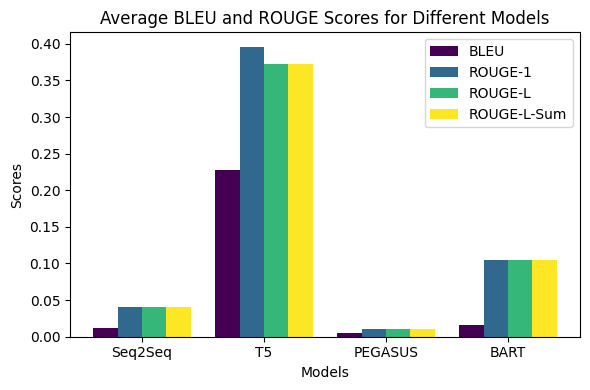

In [ ]:
from sacrebleu.metrics import BLEU
from rouge import Rouge
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Assuming df is your DataFrame containing the data

# Take only 10 data points
df_subset = df.head(10)

df_subset["GeneratedTitleSeq2Seq"] = df_subset.apply(GenTitlePreTrainedSeq2Seq, axis=1)
df_subset["GeneratedTitleT5"] = df_subset.apply(GenTitlePreTrainedT5, axis=1)
df_subset["GeneratedTitlePegasus"] = df_subset.apply(GenTitlePreTrainedpegasus, axis=1)
df_subset["GeneratedTitleBart"] = df_subset.apply(GenTitlePreTrainedBart, axis=1)

# Preprocess the generated titles and reference titles
df_subset["Title"] = preprocess(df_subset["Title"])
df_subset["GeneratedTitleSeq2Seq"] = preprocess(df_subset["GeneratedTitleSeq2Seq"])
df_subset["GeneratedTitleT5"] = preprocess(df_subset["GeneratedTitleT5"])
df_subset["GeneratedTitlePegasus"] = preprocess(df_subset["GeneratedTitlePegasus"])
df_subset["GeneratedTitleBart"] = preprocess(df_subset["GeneratedTitleBart"])

# Initialize sacreBLEU and Rouge scorers
bleu_scorer = BLEU()
rouge_scorer = Rouge()

# Calculate BLEU scores for each model
hypotheses_seq2seq = df_subset["GeneratedTitleSeq2Seq"].tolist()
references = df_subset["Title"].tolist()
scores_bleu_seq2seq = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_seq2seq, references)]

hypotheses_t5 = df_subset["GeneratedTitleT5"].tolist()
scores_bleu_t5 = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_t5, references)]

hypotheses_pegasus = df_subset["GeneratedTitlePegasus"].tolist()
scores_bleu_pegasus = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_pegasus, references)]

hypotheses_bart = df_subset["GeneratedTitleBart"].tolist()
scores_bleu_bart = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_bart, references)]

# Calculate ROUGE scores for each model
def calculate_rouge_scores(hypotheses, references):
    rouge1_scores = []
    rougeL_scores = []
    rougeLsum_scores = []
    for hyp, ref in zip(hypotheses, references):
        scores = rouge_scorer.get_scores(hyps=hyp, refs=ref)
        rouge1_scores.append(scores[0]["rouge-1"]["f"])
        rougeL_scores.append(scores[0]["rouge-l"]["f"])
        rougeLsum_scores.append(scores[0]["rouge-l"]["f"])  # ROUGE-L-Sum is the same as ROUGE-L in most implementations
    return rouge1_scores, rougeL_scores, rougeLsum_scores

# Seq2Seq Model
rouge1_scores_seq2seq, rougeL_scores_seq2seq, rougeLsum_scores_seq2seq = calculate_rouge_scores(hypotheses_seq2seq, references)

# T5 Model
rouge1_scores_t5, rougeL_scores_t5, rougeLsum_scores_t5 = calculate_rouge_scores(hypotheses_t5, references)

# Pegasus Model
rouge1_scores_pegasus, rougeL_scores_pegasus, rougeLsum_scores_pegasus = calculate_rouge_scores(hypotheses_pegasus, references)

# BART Model
rouge1_scores_bart, rougeL_scores_bart, rougeLsum_scores_bart = calculate_rouge_scores(hypotheses_bart, references)

# Plotting
models = ['Seq2Seq', 'T5', 'PEGASUS', 'BART']
avg_bleu_scores = [np.mean(scores_bleu_seq2seq), np.mean(scores_bleu_t5), np.mean(scores_bleu_pegasus), np.mean(scores_bleu_bart)]
avg_rouge1_scores = [np.mean(rouge1_scores_seq2seq), np.mean(rouge1_scores_t5), np.mean(rouge1_scores_pegasus), np.mean(rouge1_scores_bart)]
avg_rougeL_scores = [np.mean(rougeL_scores_seq2seq), np.mean(rougeL_scores_t5), np.mean(rougeL_scores_pegasus), np.mean(rougeL_scores_bart)]
avg_rougeLsum_scores = [np.mean(rougeLsum_scores_seq2seq), np.mean(rougeLsum_scores_t5), np.mean(rougeLsum_scores_pegasus), np.mean(rougeLsum_scores_bart)]

x = np.arange(len(models))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))

# Define the viridis colormap
viridis = get_cmap('viridis')

# Assign colors from the viridis colormap
colors = viridis(np.linspace(0, 1, 4))

# Plot BLEU, ROUGE-1, ROUGE-L, and ROUGE-Lsum scores with viridis colors
rects1 = ax.bar(x - 1.5 * width, avg_bleu_scores, width, label='BLEU', color=colors[0])
rects2 = ax.bar(x - 0.5 * width, avg_rouge1_scores, width, label='ROUGE-1', color=colors[1])
rects3 = ax.bar(x + 0.5 * width, avg_rougeL_scores, width, label='ROUGE-L', color=colors[2])
rects4 = ax.bar(x + 1.5 * width, avg_rougeLsum_scores, width, label='ROUGE-L-Sum', color=colors[3])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Average BLEU and ROUGE Scores for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()


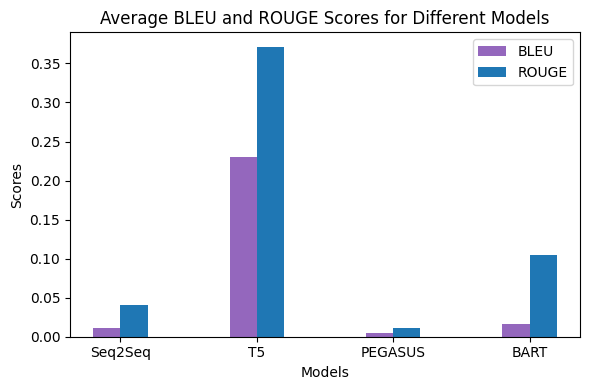

In [ ]:
from sacrebleu.metrics import BLEU
from rouge import Rouge
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Take only 10 data points
df_subset = df.head(10)

df_subset["GeneratedTitleSeq2Seq"] = df_subset.apply(GenTitlePreTrainedSeq2Seq, axis=1)
df_subset["GeneratedTitleT5"] = df_subset.apply(GenTitlePreTrainedT5, axis=1)
df_subset["GeneratedTitlePegasus"] = df_subset.apply(GenTitlePreTrainedpegasus, axis=1)
df_subset["GeneratedTitleBart"] = df_subset.apply(GenTitlePreTrainedBart, axis=1)

# Preprocess the generated titles and reference titles
df_subset["Title"] = preprocess(df_subset["Title"])
df_subset["GeneratedTitleSeq2Seq"] = preprocess(df_subset["GeneratedTitleSeq2Seq"])
df_subset["GeneratedTitleT5"] = preprocess(df_subset["GeneratedTitleT5"])
df_subset["GeneratedTitlePegasus"] = preprocess(df_subset["GeneratedTitlePegasus"])
df_subset["GeneratedTitleBart"] = preprocess(df_subset["GeneratedTitleBart"])

# Initialize sacreBLEU and Rouge scorers
bleu_scorer = BLEU()
rouge_scorer = Rouge()

# Calculate BLEU scores for each model
hypotheses_seq2seq = df_subset["GeneratedTitleSeq2Seq"].tolist()
references = df_subset["Title"].tolist()
scores_seq2seq = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_seq2seq, references)]

hypotheses_t5 = df_subset["GeneratedTitleT5"].tolist()
scores_t5 = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_t5, references)]

hypotheses_pegasus = df_subset["GeneratedTitlePegasus"].tolist()
scores_pegasus = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_pegasus, references)]

hypotheses_bart = df_subset["GeneratedTitleBart"].tolist()
scores_bart = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_bart, references)]

# Calculate Rouge scores for each model
rouge_scores_seq2seq = [rouge_scorer.get_scores(hyps=hyp, refs=ref)[0]["rouge-l"]["f"] for hyp, ref in zip(hypotheses_seq2seq, references)]
rouge_scores_t5 = [rouge_scorer.get_scores(hyps=hyp, refs=ref)[0]["rouge-l"]["f"] for hyp, ref in zip(hypotheses_t5, references)]
rouge_scores_pegasus = [rouge_scorer.get_scores(hyps=hyp, refs=ref)[0]["rouge-l"]["f"] for hyp, ref in zip(hypotheses_pegasus, references)]
rouge_scores_bart = [rouge_scorer.get_scores(hyps=hyp, refs=ref)[0]["rouge-l"]["f"] for hyp, ref in zip(hypotheses_bart, references)]

# Plotting
models = ['Seq2Seq', 'T5', 'PEGASUS', 'BART']
avg_bleu_scores = [np.mean(scores_seq2seq), np.mean(scores_t5), np.mean(scores_pegasus), np.mean(scores_bart)]
avg_rouge_scores = [np.mean(rouge_scores_seq2seq), np.mean(rouge_scores_t5), np.mean(rouge_scores_pegasus), np.mean(rouge_scores_bart)]

x = np.arange(len(models))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))

# Define colors
bleu_color = 'tab:purple'
rouge_color = 'tab:blue'

# Plot BLEU and ROUGE scores with different colors
rects1 = ax.bar(x - width/2, avg_bleu_scores, width, label='BLEU', color=bleu_color)
rects2 = ax.bar(x + width/2, avg_rouge_scores, width, label='ROUGE', color=rouge_color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Average BLEU and ROUGE Scores for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()


In [ ]:
!pip install bert-score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
!pip install bert-score
import pandas as pd
from bert_score import score

# Function to generate titles using different models
def generate_titles(df):
    df["GeneratedTitleSeq2Seq"] = df.apply(GenTitlePreTrainedSeq2Seq, axis=1)
    df["GeneratedTitleT5"] = df.apply(GenTitlePreTrainedT5, axis=1)
    df["GeneratedTitlePegasus"] = df.apply(GenTitlePreTrainedpegasus, axis=1)
    df["GeneratedTitleBart"] = df.apply(GenTitlePreTrainedBart, axis=1)
    return df

# Take only 10 data points
df_subset = df.head(10)

# Generate titles for the subset of the dataset
df_subset_with_titles = generate_titles(df_subset)

# Define predictions and references
predictions_seq2seq = df_subset_with_titles["GeneratedTitleSeq2Seq"].tolist()
predictions_t5 = df_subset_with_titles["GeneratedTitleT5"].tolist()
predictions_pegasus = df_subset_with_titles["GeneratedTitlePegasus"].tolist()
predictions_bart = df_subset_with_titles["GeneratedTitleBart"].tolist()
references = df_subset_with_titles["Title"].tolist()

# Compute BERTScore for each model's predictions
prec_seq2seq, rec_seq2seq, f1_seq2seq = score(predictions_seq2seq, references, lang='en')
prec_t5, rec_t5, f1_t5 = score(predictions_t5, references, lang='en')
prec_pegasus, rec_pegasus, f1_pegasus = score(predictions_pegasus, references, lang='en')
prec_bart, rec_bart, f1_bart = score(predictions_bart, references, lang='en')

# Print the scores
# Compute average scores
avg_prec_seq2seq = sum(prec_seq2seq) / len(prec_seq2seq)
avg_rec_seq2seq = sum(rec_seq2seq) / len(rec_seq2seq)
avg_f1_seq2seq = sum(f1_seq2seq) / len(f1_seq2seq)

avg_prec_t5 = sum(prec_t5) / len(prec_t5)
avg_rec_t5 = sum(rec_t5) / len(rec_t5)
avg_f1_t5 = sum(f1_t5) / len(f1_t5)

avg_prec_pegasus = sum(prec_pegasus) / len(prec_pegasus)
avg_rec_pegasus = sum(rec_pegasus) / len(rec_pegasus)
avg_f1_pegasus = sum(f1_pegasus) / len(f1_pegasus)

avg_prec_bart = sum(prec_bart) / len(prec_bart)
avg_rec_bart = sum(rec_bart) / len(rec_bart)
avg_f1_bart = sum(f1_bart) / len(f1_bart)

# Print the average scores
print("Average Precision for Seq2Seq Model:", avg_prec_seq2seq)
print("Average Recall for Seq2Seq Model:", avg_rec_seq2seq)
print("Average F1 Score for Seq2Seq Model:", avg_f1_seq2seq)

print("Average Precision for T5 Model:", avg_prec_t5)
print("Average Recall for T5 Model:", avg_rec_t5)
print("Average F1 Score for T5 Model:", avg_f1_t5)

print("Average Precision for Pegasus Model:", avg_prec_pegasus)
print("Average Recall for Pegasus Model:", avg_rec_pegasus)
print("Average F1 Score for Pegasus Model:", avg_f1_pegasus)

print("Average Precision for Bart Model:", avg_prec_bart)
print("Average Recall for Bart Model:", avg_rec_bart)
print("Average F1 Score for Bart Model:", avg_f1_bart)



tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro

Average Precision for Seq2Seq Model: tensor(0.8910)
Average Recall for Seq2Seq Model: tensor(0.8797)
Average F1 Score for Seq2Seq Model: tensor(0.8850)
Average Precision for T5 Model: tensor(0.8851)
Average Recall for T5 Model: tensor(0.8765)
Average F1 Score for T5 Model: tensor(0.8805)
Average Precision for Pegasus Model: tensor(0.8873)
Average Recall for Pegasus Model: tensor(0.8597)
Average F1 Score for Pegasus Model: tensor(0.8730)
Average Precision for Bart Model: tensor(0.8596)
Average Recall for Bart Model: tensor(0.8338)
Average F1 Score for Bart Model: tensor(0.8463)


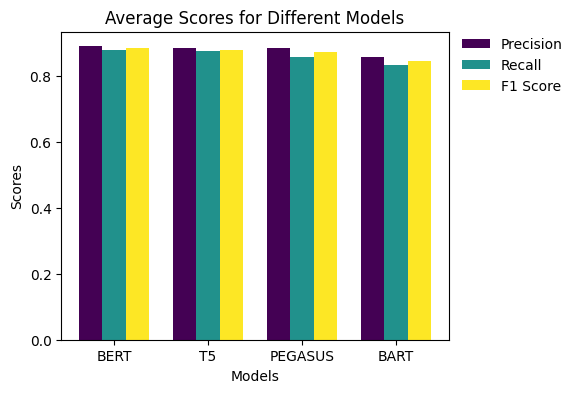

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models and their average scores
models = ['BERT', 'T5', 'PEGASUS', 'BART']
avg_precisions = [avg_prec_seq2seq, avg_prec_t5, avg_prec_pegasus, avg_prec_bart]
avg_recalls = [avg_rec_seq2seq, avg_rec_t5, avg_rec_pegasus, avg_rec_bart]
avg_f1_scores = [avg_f1_seq2seq, avg_f1_t5, avg_f1_pegasus, avg_f1_bart]

# Color map
colors = plt.cm.viridis(np.linspace(0, 1, 3))

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(5, 4))

bar_width = 0.25
index = np.arange(len(models))

bar1 = ax.bar(index, avg_precisions, bar_width, label='Precision', color=colors[0])
bar2 = ax.bar(index + bar_width, avg_recalls, bar_width, label='Recall', color=colors[1])
bar3 = ax.bar(index + 2 * bar_width, avg_f1_scores, bar_width, label='F1 Score', color=colors[2])

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Average Scores for Different Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)

# Move the legend outside of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, frameon=False)

plt.show()


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd

# Assuming df is your DataFrame containing the data

# Take only 10 data points
df_subset = df.head(10)

# Generate titles using different models
df_subset["GeneratedTitleSeq2Seq"] = df_subset.apply(GenTitlePreTrainedSeq2Seq, axis=1)
df_subset["GeneratedTitleT5"] = df_subset.apply(GenTitlePreTrainedT5, axis=1)
df_subset["GeneratedTitlePegasus"] = df_subset.apply(GenTitlePreTrainedpegasus, axis=1)
df_subset["GeneratedTitleBart"] = df_subset.apply(GenTitlePreTrainedBart, axis=1)

# Preprocess the generated titles and reference titles
df_subset["Title"] = preprocess(df_subset["Title"])
df_subset["GeneratedTitleSeq2Seq"] = preprocess(df_subset["GeneratedTitleSeq2Seq"])
df_subset["GeneratedTitleT5"] = preprocess(df_subset["GeneratedTitleT5"])
df_subset["GeneratedTitlePegasus"] = preprocess(df_subset["GeneratedTitlePegasus"])
df_subset["GeneratedTitleBart"] = preprocess(df_subset["GeneratedTitleBart"])

# Tokenize the titles
df_subset["Title"] = df_subset["Title"].apply(word_tokenize)
df_subset["GeneratedTitleSeq2Seq"] = df_subset["GeneratedTitleSeq2Seq"].apply(word_tokenize)
df_subset["GeneratedTitleT5"] = df_subset["GeneratedTitleT5"].apply(word_tokenize)
df_subset["GeneratedTitlePegasus"] = df_subset["GeneratedTitlePegasus"].apply(word_tokenize)
df_subset["GeneratedTitleBart"] = df_subset["GeneratedTitleBart"].apply(word_tokenize)

# Calculate METEOR scores for each model
def calculate_meteor_scores(hypotheses, references):
    return [meteor_score([ref], hyp) for hyp, ref in zip(hypotheses, references)]

hypotheses_seq2seq = df_subset["GeneratedTitleSeq2Seq"].tolist()
references = df_subset["Title"].tolist()
scores_seq2seq = calculate_meteor_scores(hypotheses_seq2seq, references)

hypotheses_t5 = df_subset["GeneratedTitleT5"].tolist()
scores_t5 = calculate_meteor_scores(hypotheses_t5, references)

hypotheses_pegasus = df_subset["GeneratedTitlePegasus"].tolist()
scores_pegasus = calculate_meteor_scores(hypotheses_pegasus, references)

hypotheses_bart = df_subset["GeneratedTitleBart"].tolist()
scores_bart = calculate_meteor_scores(hypotheses_bart, references)

# Print average METEOR scores
print("Average METEOR Score for Seq2Seq Model:", np.mean(scores_seq2seq))
print("Average METEOR Score for T5 Model:", np.mean(scores_t5))
print("Average METEOR Score for Pegasus Model:", np.mean(scores_pegasus))
print("Average METEOR Score for BART Model:", np.mean(scores_bart))


Average METEOR Score for Seq2Seq Model: 0.45438458298703727
Average METEOR Score for T5 Model: 0.42717100891818494
Average METEOR Score for Pegasus Model: 0.30102123707996953
Average METEOR Score for BART Model: 0.16395564467957188


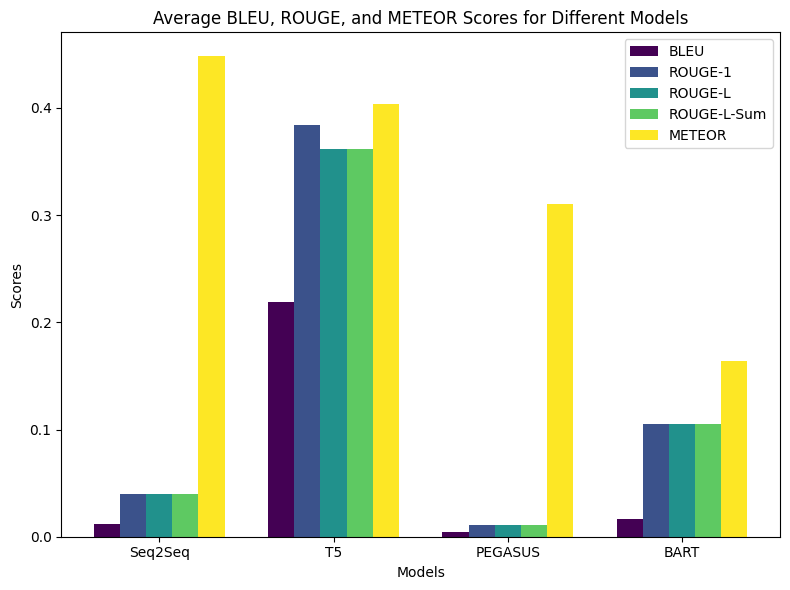

In [ ]:
from sacrebleu.metrics import BLEU
from rouge import Rouge
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

# Assuming df is your DataFrame containing the data

# Take only 10 data points
df_subset = df.head(10)

# Generate titles using different models
df_subset["GeneratedTitleSeq2Seq"] = df_subset.apply(GenTitlePreTrainedSeq2Seq, axis=1)
df_subset["GeneratedTitleT5"] = df_subset.apply(GenTitlePreTrainedT5, axis=1)
df_subset["GeneratedTitlePegasus"] = df_subset.apply(GenTitlePreTrainedpegasus, axis=1)
df_subset["GeneratedTitleBart"] = df_subset.apply(GenTitlePreTrainedBart, axis=1)

# Preprocess the generated titles and reference titles
df_subset["Title"] = preprocess(df_subset["Title"])
df_subset["GeneratedTitleSeq2Seq"] = preprocess(df_subset["GeneratedTitleSeq2Seq"])
df_subset["GeneratedTitleT5"] = preprocess(df_subset["GeneratedTitleT5"])
df_subset["GeneratedTitlePegasus"] = preprocess(df_subset["GeneratedTitlePegasus"])
df_subset["GeneratedTitleBart"] = preprocess(df_subset["GeneratedTitleBart"])

# Initialize sacreBLEU and Rouge scorers
bleu_scorer = BLEU()
rouge_scorer = Rouge()

# Calculate BLEU scores for each model
hypotheses_seq2seq = df_subset["GeneratedTitleSeq2Seq"].tolist()
references = df_subset["Title"].tolist()
scores_bleu_seq2seq = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_seq2seq, references)]

hypotheses_t5 = df_subset["GeneratedTitleT5"].tolist()
scores_bleu_t5 = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_t5, references)]

hypotheses_pegasus = df_subset["GeneratedTitlePegasus"].tolist()
scores_bleu_pegasus = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_pegasus, references)]

hypotheses_bart = df_subset["GeneratedTitleBart"].tolist()
scores_bleu_bart = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_bart, references)]

# Calculate ROUGE scores for each model
def calculate_rouge_scores(hypotheses, references):
    rouge1_scores = []
    rougeL_scores = []
    rougeLsum_scores = []
    for hyp, ref in zip(hypotheses, references):
        scores = rouge_scorer.get_scores(hyps=hyp, refs=ref)
        rouge1_scores.append(scores[0]["rouge-1"]["f"])
        rougeL_scores.append(scores[0]["rouge-l"]["f"])
        rougeLsum_scores.append(scores[0]["rouge-l"]["f"])  # ROUGE-L-Sum is the same as ROUGE-L in most implementations
    return rouge1_scores, rougeL_scores, rougeLsum_scores

# Seq2Seq Model
rouge1_scores_seq2seq, rougeL_scores_seq2seq, rougeLsum_scores_seq2seq = calculate_rouge_scores(hypotheses_seq2seq, references)

# T5 Model
rouge1_scores_t5, rougeL_scores_t5, rougeLsum_scores_t5 = calculate_rouge_scores(hypotheses_t5, references)

# Pegasus Model
rouge1_scores_pegasus, rougeL_scores_pegasus, rougeLsum_scores_pegasus = calculate_rouge_scores(hypotheses_pegasus, references)

# BART Model
rouge1_scores_bart, rougeL_scores_bart, rougeLsum_scores_bart = calculate_rouge_scores(hypotheses_bart, references)

# Tokenize the titles for METEOR score calculation
df_subset["TokenizedTitle"] = df_subset["Title"].apply(word_tokenize)
df_subset["TokenizedGeneratedTitleSeq2Seq"] = df_subset["GeneratedTitleSeq2Seq"].apply(word_tokenize)
df_subset["TokenizedGeneratedTitleT5"] = df_subset["GeneratedTitleT5"].apply(word_tokenize)
df_subset["TokenizedGeneratedTitlePegasus"] = df_subset["GeneratedTitlePegasus"].apply(word_tokenize)
df_subset["TokenizedGeneratedTitleBart"] = df_subset["GeneratedTitleBart"].apply(word_tokenize)

# Calculate METEOR scores for each model
def calculate_meteor_scores(hypotheses, references):
    return [meteor_score([ref], hyp) for hyp, ref in zip(hypotheses, references)]

tokenized_references = df_subset["TokenizedTitle"].tolist()
tokenized_hypotheses_seq2seq = df_subset["TokenizedGeneratedTitleSeq2Seq"].tolist()
tokenized_hypotheses_t5 = df_subset["TokenizedGeneratedTitleT5"].tolist()
tokenized_hypotheses_pegasus = df_subset["TokenizedGeneratedTitlePegasus"].tolist()
tokenized_hypotheses_bart = df_subset["TokenizedGeneratedTitleBart"].tolist()

scores_meteor_seq2seq = calculate_meteor_scores(tokenized_hypotheses_seq2seq, tokenized_references)
scores_meteor_t5 = calculate_meteor_scores(tokenized_hypotheses_t5, tokenized_references)
scores_meteor_pegasus = calculate_meteor_scores(tokenized_hypotheses_pegasus, tokenized_references)
scores_meteor_bart = calculate_meteor_scores(tokenized_hypotheses_bart, tokenized_references)

# Calculate average scores
models = ['Seq2Seq', 'T5', 'PEGASUS', 'BART']
avg_bleu_scores = [np.mean(scores_bleu_seq2seq), np.mean(scores_bleu_t5), np.mean(scores_bleu_pegasus), np.mean(scores_bleu_bart)]
avg_rouge1_scores = [np.mean(rouge1_scores_seq2seq), np.mean(rouge1_scores_t5), np.mean(rouge1_scores_pegasus), np.mean(rouge1_scores_bart)]
avg_rougeL_scores = [np.mean(rougeL_scores_seq2seq), np.mean(rougeL_scores_t5), np.mean(rougeL_scores_pegasus), np.mean(rougeL_scores_bart)]
avg_rougeLsum_scores = [np.mean(rougeLsum_scores_seq2seq), np.mean(rougeLsum_scores_t5), np.mean(rougeLsum_scores_pegasus), np.mean(rougeLsum_scores_bart)]
avg_meteor_scores = [np.mean(scores_meteor_seq2seq), np.mean(scores_meteor_t5), np.mean(scores_meteor_pegasus), np.mean(scores_meteor_bart)]

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

# Define the viridis colormap
viridis = get_cmap('viridis')

# Assign colors from the viridis colormap
colors = viridis(np.linspace(0, 1, 5))

# Plot BLEU, ROUGE-1, ROUGE-L, ROUGE-Lsum, and METEOR scores with viridis colors
rects1 = ax.bar(x - 2 * width, avg_bleu_scores, width, label='BLEU', color=colors[0])
rects2 = ax.bar(x - width, avg_rouge1_scores, width, label='ROUGE-1', color=colors[1])
rects3 = ax.bar(x, avg_rougeL_scores, width, label='ROUGE-L', color=colors[2])
rects4 = ax.bar(x + width, avg_rougeLsum_scores, width, label='ROUGE-L-Sum', color=colors[3])
rects5 = ax.bar(x + 2 * width, avg_meteor_scores, width, label='METEOR', color=colors[4])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Average BLEU, ROUGE, and METEOR Scores for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()

plt.show()


In [ ]:
!pip install gensim nltk


In [ ]:
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import gensim.downloader as api

# Assuming df is your DataFrame containing the data

# Take only 10 data points
df_subset = df.head(10)

# Generate titles using different models
df_subset["GeneratedTitleSeq2Seq"] = df_subset.apply(GenTitlePreTrainedSeq2Seq, axis=1)
df_subset["GeneratedTitleT5"] = df_subset.apply(GenTitlePreTrainedT5, axis=1)
df_subset["GeneratedTitlePegasus"] = df_subset.apply(GenTitlePreTrainedpegasus, axis=1)
df_subset["GeneratedTitleBart"] = df_subset.apply(GenTitlePreTrainedBart, axis=1)

# Preprocess the generated titles and reference titles
df_subset["Title"] = preprocess(df_subset["Title"])
df_subset["GeneratedTitleSeq2Seq"] = preprocess(df_subset["GeneratedTitleSeq2Seq"])
df_subset["GeneratedTitleT5"] = preprocess(df_subset["GeneratedTitleT5"])
df_subset["GeneratedTitlePegasus"] = preprocess(df_subset["GeneratedTitlePegasus"])
df_subset["GeneratedTitleBart"] = preprocess(df_subset["GeneratedTitleBart"])

# Tokenize the titles
df_subset["Title"] = df_subset["Title"].apply(word_tokenize)
df_subset["GeneratedTitleSeq2Seq"] = df_subset["GeneratedTitleSeq2Seq"].apply(word_tokenize)
df_subset["GeneratedTitleT5"] = df_subset["GeneratedTitleT5"].apply(word_tokenize)
df_subset["GeneratedTitlePegasus"] = df_subset["GeneratedTitlePegasus"].apply(word_tokenize)
df_subset["GeneratedTitleBart"] = df_subset["GeneratedTitleBart"].apply(word_tokenize)

# Load pre-trained GloVe embeddings
glove_vectors = api.load("glove-wiki-gigaword-50")

# Function to calculate WMD scores
def calculate_wmd_scores(hypotheses, references, model):
    return [model.wmdistance(hyp, ref) for hyp, ref in zip(hypotheses, references)]

# Convert tokenized titles back to strings for WMD calculation
def detokenize(tokens):
    return ' '.join(tokens)

hypotheses_seq2seq = df_subset["GeneratedTitleSeq2Seq"].apply(detokenize).tolist()
references = df_subset["Title"].apply(detokenize).tolist()
scores_seq2seq = calculate_wmd_scores(hypotheses_seq2seq, references, glove_vectors)

hypotheses_t5 = df_subset["GeneratedTitleT5"].apply(detokenize).tolist()
scores_t5 = calculate_wmd_scores(hypotheses_t5, references, glove_vectors)

hypotheses_pegasus = df_subset["GeneratedTitlePegasus"].apply(detokenize).tolist()
scores_pegasus = calculate_wmd_scores(hypotheses_pegasus, references, glove_vectors)

hypotheses_bart = df_subset["GeneratedTitleBart"].apply(detokenize).tolist()
scores_bart = calculate_wmd_scores(hypotheses_bart, references, glove_vectors)

# Print average WMD scores
print("Average WMD Score for Seq2Seq Model:", np.mean(scores_seq2seq))
print("Average WMD Score for T5 Model:", np.mean(scores_t5))
print("Average WMD Score for Pegasus Model:", np.mean(scores_pegasus))
print("Average WMD Score for BART Model:", np.mean(scores_bart))


[==================================================] 100.0% 66.0/66.0MB downloaded


ModuleNotFoundError: No module named 'ot'

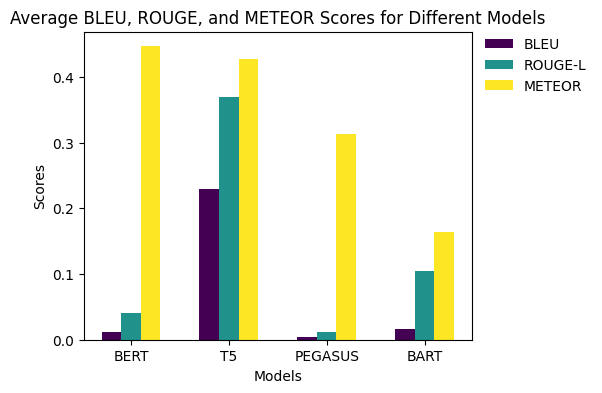

In [ ]:
from sacrebleu.metrics import BLEU
from rouge import Rouge
from nltk.translate.meteor_score import meteor_score
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
import gensim.downloader as api

# Assuming df is your DataFrame containing the data

# Take only 10 data points
df_subset = df.head(10)

# Generate titles using different models
df_subset["GeneratedTitleSeq2Seq"] = df_subset.apply(GenTitlePreTrainedSeq2Seq, axis=1)
df_subset["GeneratedTitleT5"] = df_subset.apply(GenTitlePreTrainedT5, axis=1)
df_subset["GeneratedTitlePegasus"] = df_subset.apply(GenTitlePreTrainedpegasus, axis=1)
df_subset["GeneratedTitleBart"] = df_subset.apply(GenTitlePreTrainedBart, axis=1)

# Preprocess the generated titles and reference titles
df_subset["Title"] = preprocess(df_subset["Title"])
df_subset["GeneratedTitleSeq2Seq"] = preprocess(df_subset["GeneratedTitleSeq2Seq"])
df_subset["GeneratedTitleT5"] = preprocess(df_subset["GeneratedTitleT5"])
df_subset["GeneratedTitlePegasus"] = preprocess(df_subset["GeneratedTitlePegasus"])
df_subset["GeneratedTitleBart"] = preprocess(df_subset["GeneratedTitleBart"])

# Initialize sacreBLEU and Rouge scorers
bleu_scorer = BLEU()
rouge_scorer = Rouge()

# Calculate BLEU scores for each model
hypotheses_seq2seq = df_subset["GeneratedTitleSeq2Seq"].tolist()
references = df_subset["Title"].tolist()
scores_bleu_seq2seq = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_seq2seq, references)]

hypotheses_t5 = df_subset["GeneratedTitleT5"].tolist()
scores_bleu_t5 = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_t5, references)]

hypotheses_pegasus = df_subset["GeneratedTitlePegasus"].tolist()
scores_bleu_pegasus = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_pegasus, references)]

hypotheses_bart = df_subset["GeneratedTitleBart"].tolist()
scores_bleu_bart = [bleu_scorer.sentence_score(hypothesis=hyp, references=[ref]).score / 100 for hyp, ref in zip(hypotheses_bart, references)]

# Calculate ROUGE-L scores for each model
def calculate_rougeL_scores(hypotheses, references):
    rougeL_scores = []
    for hyp, ref in zip(hypotheses, references):
        scores = rouge_scorer.get_scores(hyps=hyp, refs=ref)
        rougeL_scores.append(scores[0]["rouge-l"]["f"])
    return rougeL_scores

# Seq2Seq Model
rougeL_scores_seq2seq = calculate_rougeL_scores(hypotheses_seq2seq, references)

# T5 Model
rougeL_scores_t5 = calculate_rougeL_scores(hypotheses_t5, references)

# Pegasus Model
rougeL_scores_pegasus = calculate_rougeL_scores(hypotheses_pegasus, references)

# BART Model
rougeL_scores_bart = calculate_rougeL_scores(hypotheses_bart, references)

# Tokenize the titles for METEOR score calculation
df_subset["TokenizedTitle"] = df_subset["Title"].apply(word_tokenize)
df_subset["TokenizedGeneratedTitleSeq2Seq"] = df_subset["GeneratedTitleSeq2Seq"].apply(word_tokenize)
df_subset["TokenizedGeneratedTitleT5"] = df_subset["GeneratedTitleT5"].apply(word_tokenize)
df_subset["TokenizedGeneratedTitlePegasus"] = df_subset["GeneratedTitlePegasus"].apply(word_tokenize)
df_subset["TokenizedGeneratedTitleBart"] = df_subset["GeneratedTitleBart"].apply(word_tokenize)

# Calculate METEOR scores for each model
def calculate_meteor_scores(hypotheses, references):
    return [meteor_score([ref], hyp) for hyp, ref in zip(hypotheses, references)]

tokenized_references = df_subset["TokenizedTitle"].tolist()
tokenized_hypotheses_seq2seq = df_subset["TokenizedGeneratedTitleSeq2Seq"].tolist()
tokenized_hypotheses_t5 = df_subset["TokenizedGeneratedTitleT5"].tolist()
tokenized_hypotheses_pegasus = df_subset["TokenizedGeneratedTitlePegasus"].tolist()
tokenized_hypotheses_bart = df_subset["TokenizedGeneratedTitleBart"].tolist()

scores_meteor_seq2seq = calculate_meteor_scores(tokenized_hypotheses_seq2seq, tokenized_references)
scores_meteor_t5 = calculate_meteor_scores(tokenized_hypotheses_t5, tokenized_references)
scores_meteor_pegasus = calculate_meteor_scores(tokenized_hypotheses_pegasus, tokenized_references)
scores_meteor_bart = calculate_meteor_scores(tokenized_hypotheses_bart, tokenized_references)

# Calculate average scores
models = ['BERT', 'T5', 'PEGASUS', 'BART']
avg_bleu_scores = [np.mean(scores_bleu_seq2seq), np.mean(scores_bleu_t5), np.mean(scores_bleu_pegasus), np.mean(scores_bleu_bart)]
avg_rougeL_scores = [np.mean(rougeL_scores_seq2seq), np.mean(rougeL_scores_t5), np.mean(rougeL_scores_pegasus), np.mean(rougeL_scores_bart)]
avg_meteor_scores = [np.mean(scores_meteor_seq2seq), np.mean(scores_meteor_t5), np.mean(scores_meteor_pegasus), np.mean(scores_meteor_bart)]

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(5, 4))

# Define the viridis colormap
viridis = get_cmap('viridis')

# Assign colors from the viridis colormap
colors = viridis(np.linspace(0, 1, 3))

# Plot BLEU, ROUGE-L, and METEOR scores with viridis colors
rects1 = ax.bar(x - width, avg_bleu_scores, width, label='BLEU', color=colors[0])
rects2 = ax.bar(x, avg_rougeL_scores, width, label='ROUGE-L', color=colors[1])
rects3 = ax.bar(x + width, avg_meteor_scores, width, label='METEOR', color=colors[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Average BLEU, ROUGE, and METEOR Scores for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)

ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, frameon=False)

plt.show()
